### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [2]:
print(visits.columns)
print()
visits.info()
print()
print('Полных дублей', visits.duplicated().sum())
display(visits)

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Полных дублей 0


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [3]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits['session_start'] = pd.to_datetime(visits['session_start'], infer_datetime_format=True)
visits['session_end'] = pd.to_datetime(visits['session_end'], infer_datetime_format=True)
visits.info()
display(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [4]:
#Проверим наличие не полных дублей в столбцах таблицы
display(visits['region'].value_counts())
display(visits['device'].value_counts())
display(visits['channel'].value_counts())

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Данные приведены к нужным типам. Нет ни полных дублей ни схожих наименований в отдельных столбцах. Проверим таким же способом остальные таблицы.

In [5]:
print(orders.columns)
print()
orders.info()
print()
print('Полных дублей', orders.duplicated().sum())
display(orders)

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Полных дублей 0


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [6]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders['event_dt'] = pd.to_datetime(orders['event_dt'], infer_datetime_format=True)
orders.info()
display(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [7]:
print(costs.columns)
print()
costs.info()
print()
print('Полных дублей', costs.duplicated().sum())
display(costs)

Index(['dt', 'Channel', 'costs'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Полных дублей 0


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [8]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]
costs['dt'] = pd.to_datetime(costs['dt'], infer_datetime_format=True).dt.date
costs.info()
display(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [9]:
display(costs['channel'].value_counts())

LeapBob               180
MediaTornado          180
WahooNetBanner        180
lambdaMediaAds        180
RocketSuperAds        180
AdNonSense            180
TipTop                180
FaceBoom              180
YRabbit               180
OppleCreativeMedia    180
Name: channel, dtype: int64

Названия столбцов приведены к строчному формату, пробелы заменены на нижние подчеркивания, даты приведены к нужному формату. Дубликатов и пропусков нет.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Здесь будут прописаны функции для расчета бизнес показателей и их визуализации.

In [10]:
#создание профилей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
#расчет конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
#расчет ltv и roi
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [18]:
#создадим пользовательские профили и выведем их для визуального анализа
events = None
profiles = get_profiles(visits, orders, events, costs, event_names=[])
display(profiles.head(10))
profiles.info()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
user_id             150008 non-null int64
first_ts            150008 non-null datetime64[ns]
channel             150008 non-null object
device              150008 non-null object
region              150008 non-null object
dt                  150008 non-null object
month               150008 non-null datetime64[ns]
payer               150008 non-null bool
acquisition_cost    150008 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [19]:
uni_users = visits.pivot_table(index='user_id', aggfunc={
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }).reset_index()
uni_users['payer'] = uni_users['user_id'].isin(orders['user_id'].unique())

def tab_maker(x):
    conv = uni_users.pivot_table(index=x, values=['user_id', 'payer'], aggfunc={'user_id':'nunique', 'payer':'sum'})
    conv = conv.loc[:, ['user_id', 'payer']]
    conv.columns = ['users', 'payers']
    conv['payers, %'] = conv['payers'] / conv['users'] *100
    return conv.sort_values(by='users', ascending=False)

tab_maker('region')

,users,payers,"payers, %"
region,,,
United States,100002,6902.0,6.901862
UK,17575,700.0,3.982930
France,17450,663.0,3.799427
Germany,14981,616.0,4.111875


In [20]:
tab_maker('device')

,users,payers,"payers, %"
device,,,
iPhone,54479,3382.0,6.207897
Android,35032,2050.0,5.851793
PC,30455,1537.0,5.046790
Mac,30042,1912.0,6.364423


In [21]:
tab_maker('channel')

,users,payers,"payers, %"
channel,,,
organic,56439,1160.0,2.055316
FaceBoom,29144,3557.0,12.204914
TipTop,19561,1878.0,9.600736
OppleCreativeMedia,8605,233.0,2.707728
LeapBob,8553,262.0,3.063253
WahooNetBanner,8553,453.0,5.296387
RocketSuperAds,4448,352.0,7.913669
MediaTornado,4364,156.0,3.574702
YRabbit,4312,165.0,3.826531


Визуально, полученные данные в порядке.

In [22]:
print(profiles['first_ts'].min(), profiles['first_ts'].max())

2019-05-01 00:00:41 2019-10-27 23:59:04


Как и было указано в описании, в файлах информация о пользователях привлеченных с 1 мая по 27 октября 2019 года.

,users,payers,"payers, %"
region,,,
United States,100002,6902.0,6.901862
UK,17575,700.0,3.982930
France,17450,663.0,3.799427
Germany,14981,616.0,4.111875


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
United States,95042,0.048799,0.055270,0.058206,0.060436,0.062057,0.063035,0.063867,0.064687,0.065308,0.065876,0.066223,0.066497,0.066697,0.066949
UK,16710,0.025913,0.029922,0.032615,0.033872,0.035009,0.035667,0.036505,0.037044,0.037283,0.037642,0.037882,0.037941,0.038061,0.038121
France,16624,0.024362,0.028152,0.030618,0.032122,0.033446,0.034288,0.034889,0.035190,0.035671,0.036153,0.036273,0.036634,0.036754,0.036814
Germany,14244,0.025274,0.030890,0.033418,0.035383,0.036226,0.037209,0.037770,0.038472,0.039034,0.039385,0.039455,0.039525,0.039596,0.040017


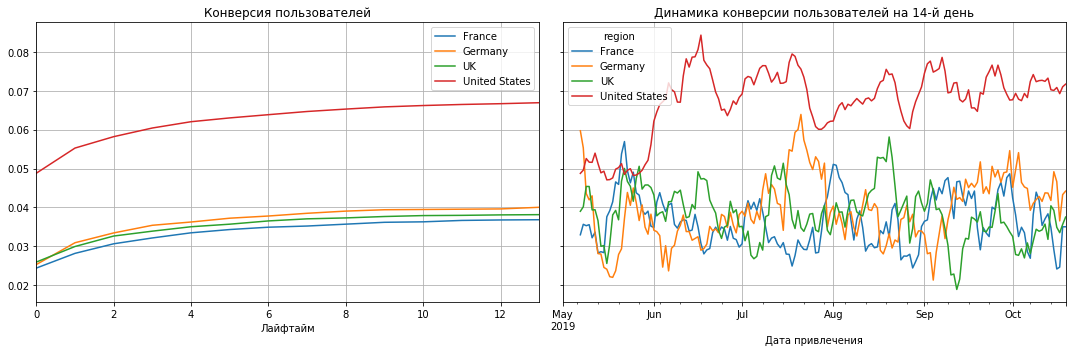

In [23]:
#по заданию датой анализа явлется 1 ноября 2019г, а бизнес модель расчитана на окупаемость в течение 14 дней

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

display(tab_maker('region'))

display(conversion.sort_values(by='cohort_size', ascending=False))

plot_conversion(conversion, conversion_in_time, 14, window=7)

Больше всего пользователей приходит из США, доля этой страны более чем в 2 раза превышает число пользователей из других стран вместе взятых. Число платящих пользователей также на всем протяжении лайфтайма значительно выше показателей других стран.

,users,payers,"payers, %"
device,,,
iPhone,54479,3382.0,6.207897
Android,35032,2050.0,5.851793
PC,30455,1537.0,5.046790
Mac,30042,1912.0,6.364423


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Mac,28588,0.044494,0.050861,0.053764,0.055723,0.056912,0.057961,0.058731,0.059431,0.060025,0.060690,0.061075,0.061214,0.061284,0.061634
iPhone,51766,0.043252,0.048970,0.051926,0.054225,0.055674,0.056562,0.057219,0.058030,0.058629,0.059093,0.059363,0.059672,0.059827,0.060020
Android,33288,0.040675,0.046593,0.049597,0.051400,0.052932,0.053803,0.054704,0.055275,0.055696,0.056267,0.056537,0.056837,0.057138,0.057258
PC,28978,0.033508,0.038685,0.040928,0.042688,0.044309,0.045241,0.046104,0.046829,0.047415,0.047795,0.048002,0.048140,0.048278,0.048554


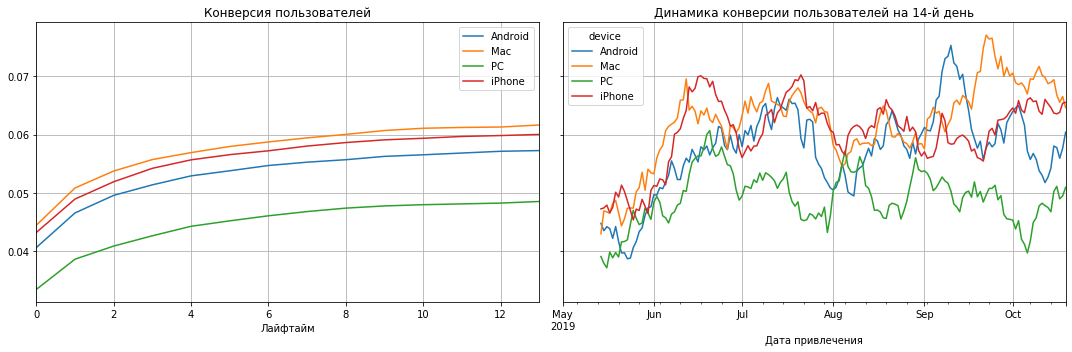

In [24]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

display(tab_maker('device'))

display(conversion.sort_values(by=13, ascending=False))

plot_conversion(conversion, conversion_in_time, 14, window=14)

Что касается распределения платных пользователей по используемым устройствам - лидирует пользователи компании Apple, с небольшим отрывом идут пользователи системы Android и замыкает с значительным отставанием владельцы PC. 

,users,payers,"payers, %"
channel,,,
organic,56439,1160.0,2.055316
FaceBoom,29144,3557.0,12.204914
TipTop,19561,1878.0,9.600736
OppleCreativeMedia,8605,233.0,2.707728
LeapBob,8553,262.0,3.063253
WahooNetBanner,8553,453.0,5.296387
RocketSuperAds,4448,352.0,7.913669
MediaTornado,4364,156.0,3.574702
YRabbit,4312,165.0,3.826531


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
AdNonSense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
lambdaMediaAds,2056,0.072471,0.081712,0.085117,0.088521,0.092412,0.095817,0.099708,0.100681,0.102626,0.103113,0.103113,0.103599,0.103599,0.103599
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
WahooNetBanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
LeapBob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248


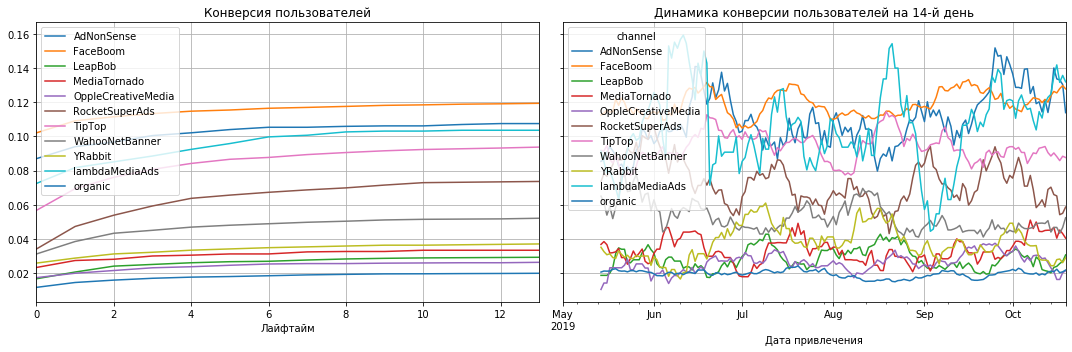

In [25]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

display(tab_maker('channel'))

display(conversion.sort_values(by=13, ascending=False))

plot_conversion(conversion, conversion_in_time, 14, window=14)

Лучшими в привлечении платящих пользователей являются FaceBoom, AdNonSense и lambdaMediaAds, немного отстает от них TipTop. Что же касается "естественного трафика", пользователей самостоятельно пришедших в приложение, этот источник привлекает более трети всех пользователей, но имеет самый низкий показатель конверсии. Может стоит с этим поработать?

Немного выше был сделан вывод что хуже всех конверсия у пользователей PC. Проверим, действительно ли у пользователей PC есть проблемы с совершением покупок или причиной этого внешние факторы. Отсортируем данные одновременно по пользовательской платформе и каналу привлечения и если у владельцев PC есть технические проблемы, то все каналы привлечения PC будут исключительно в аутсайдерах по конверсии. Если же нет - причины низкой конверсии кроются в другом.

In [26]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device', 'channel'],
    ignore_horizon=False,
)

display(conversion.sort_values(by=13, ascending=False))

,,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,channel,,,,,,,,,,,,,,,
Android,FaceBoom,5569,0.115820,0.123361,0.125157,0.126414,0.128030,0.128569,0.129467,0.129826,0.130365,0.130903,0.131083,0.131442,0.131621,0.131621
Mac,FaceBoom,6881,0.103619,0.110594,0.113646,0.115390,0.116553,0.117134,0.118587,0.119023,0.119605,0.120477,0.120622,0.120767,0.120767,0.121203
iPhone,lambdaMediaAds,416,0.084135,0.091346,0.098558,0.108173,0.108173,0.110577,0.115385,0.115385,0.117788,0.117788,0.117788,0.120192,0.120192,0.120192
PC,AdNonSense,1491,0.101274,0.109323,0.109993,0.112005,0.114017,0.116030,0.117371,0.117371,0.117371,0.117371,0.117371,0.117371,0.117371,0.117371
iPhone,FaceBoom,12261,0.097382,0.103988,0.106353,0.108311,0.109779,0.110431,0.111247,0.111818,0.112389,0.112960,0.113204,0.113775,0.114102,0.114428
PC,FaceBoom,2833,0.091776,0.099894,0.101659,0.104483,0.105895,0.107307,0.108366,0.109072,0.109778,0.110131,0.111190,0.111543,0.111896,0.112248
iPhone,AdNonSense,764,0.079843,0.086387,0.089005,0.095550,0.098168,0.100785,0.100785,0.100785,0.103403,0.103403,0.103403,0.107330,0.108639,0.108639
Android,TipTop,3672,0.061547,0.077070,0.085240,0.090142,0.094499,0.096950,0.098856,0.100218,0.100490,0.101307,0.102669,0.103486,0.104575,0.104847
PC,TipTop,1904,0.060399,0.071954,0.080357,0.085609,0.090861,0.092962,0.094013,0.096113,0.098739,0.099265,0.099265,0.099790,0.100840,0.101366


Отсортировав таблицу видно что пользователи разных устройств могут находиться как в топе так и в аутсайдерах, каналы с высококй конверсией показывают хорошие результаты на всех платформах, а следовательно, причины только в каналах привлечения, а не в работе приложения на разных устройствах.

Проверим наличие взаимосвязи между страной проживания пользователя и источников его привлечения.

In [27]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region', 'channel'],
    ignore_horizon=False,
)

display(conversion.sort_values(by=13, ascending=False))

cohort_size       0.0       1.0       2.0  \
region        channel                                                         
United States FaceBoom                  27544  0.102091  0.109134  0.111494   
France        lambdaMediaAds              708  0.077684  0.086158  0.088983   
Germany       AdNonSense                 1160  0.089655  0.097414  0.098276   
UK            AdNonSense                 1237  0.088116  0.096200  0.099434   
Germany       lambdaMediaAds              622  0.065916  0.078778  0.081994   
France        AdNonSense                 1305  0.083525  0.088889  0.092720   
UK            lambdaMediaAds              726  0.073003  0.079890  0.084022   
United States TipTop                    18498  0.056709  0.069413  0.076062   
              RocketSuperAds             4251  0.034110  0.047283  0.053870   
Germany       WahooNetBanner             2439  0.030750  0.041000  0.046330   
UK            WahooNetBanner             2809  0.029192  0.035956  0.041652   
France        WahooNetBanner             2834  0.033522  0.038814  0.042343   
United States YRabbit                    4102  0.025841  0.028766  0.031204   
              MediaTornado               4167  0.023278  0.027358  0.028078   
UK            LeapBob                    2886  0.019404  0.023562  0.026681   
France        LeapBob                    2839  0.015146  0.019021  0.023952   
UK            OppleCreativeMedia         2878  0.020500  0.022933  0.023975   
Germany       LeapBob                    2378  0.015139  0.018923  0.021026   
France        OppleCreativeMedia         2830  0.016254  0.018728  0.020848   
Germany       OppleCreativeMedia         2431  0.014809  0.017688  0.019334   
              organic                    5214  0.013042  0.017261  0.019371   
United States organic                   36480  0.011760  0.014529  0.015899   
UK            organic                    6174  0.011986  0.014253  0.015873   
France        organic                    6108  0.009332  0.012115  0.012770   

                                       3.0       4.0       5.0       6.0  \
region        channel                                                      
United States FaceBoom            0.113346  0.114762  0.115452  0.116468   
France        lambdaMediaAds      0.093220  0.100282  0.104520  0.108757   
Germany       AdNonSense          0.104310  0.105172  0.107759  0.108621   
UK            AdNonSense          0.102668  0.105901  0.107518  0.109135   
Germany       lambdaMediaAds      0.086817  0.088424  0.091640  0.096463   
France        AdNonSense          0.095019  0.095785  0.097318  0.098851   
UK            lambdaMediaAds      0.085399  0.088154  0.090909  0.093664   
United States TipTop              0.080711  0.084171  0.086604  0.087685   
              RocketSuperAds      0.059280  0.063750  0.065632  0.067278   
Germany       WahooNetBanner      0.048380  0.050841  0.052071  0.052891   
UK            WahooNetBanner      0.043432  0.044856  0.046280  0.047348   
France        WahooNetBanner      0.043754  0.045519  0.046224  0.046930   
United States YRabbit             0.032179  0.033398  0.034130  0.034861   
              MediaTornado        0.029998  0.030478  0.031198  0.031198   
UK            LeapBob             0.027374  0.028067  0.028760  0.029453   
France        LeapBob             0.025009  0.026770  0.027122  0.027122   
UK            OppleCreativeMedia  0.025712  0.026407  0.026755  0.027797   
Germany       LeapBob             0.022288  0.022708  0.023549  0.023549   
France        OppleCreativeMedia  0.022615  0.022968  0.024028  0.024382   
Germany       OppleCreativeMedia  0.020568  0.021390  0.022624  0.023447   
              organic             0.020713  0.020905  0.021097  0.021097   
United States organic             0.016996  0.017681  0.018092  0.018668   
UK            organic             0.016521  0.017331  0.017331  0.017655   
France        organic             0.013916  0.014735  0.015226  0.015553   

  

А вот это уже очень интересно. Источники привлечения в США и странах Европы не совпадают. Также видно что все страны равномерно представлены в таблице отсортированной по убыванию конверсии, а вот источники привлечения чаще занимают смежных места в рейтинге мало зависимо от страны. Вывод напрашивается сам собой - конверсия в незначительной степени зависит от устройства и страны проживания, конверсия зависит именно от источника. Следует проверить будет ли эта взаимосвязь работать с другими показателями.

**Вывод:** Подавляющее большинство пользователей приложения - жители Соединенных Штатов, на них приходится около 2/3 всех польователей. Эта же страна лидирует и по доле платящих пользователей. Конверсия мало отличается у пользователей различных устройств, лишь пользователи PC отстают от прочих. Самая значительная взаимосвязь конверсии выявлена с источниками привлечения.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [28]:
#вычислим общую сумму расходов на маркетинг
print('Общая стоимость расходовна маркетинг: {:.2f}'.format(profiles['acquisition_cost'].sum()))

Общая стоимость расходовна маркетинг: 105497.30


,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


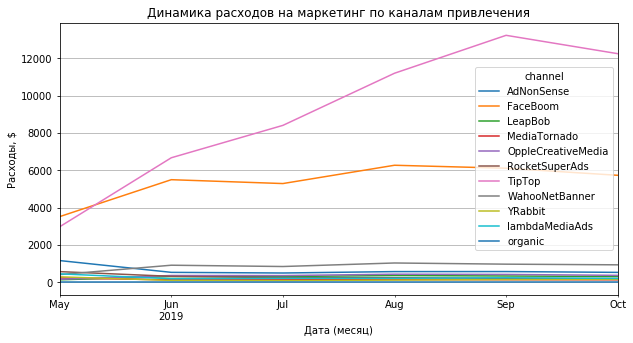

In [29]:
#вычислим траты на каждый источник

display(profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='sum'
).sort_values(by='acquisition_cost', ascending=False))

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы, $')
plt.xlabel('Дата (месяц)')
plt.title('Динамика расходов на маркетинг по каналам привлечения')
plt.show()

Траты на источники TipTop и FaceBoom значительно опережают траты на другие источники. Стоит отметить что эти источники привлекают аудиторию только 1 страны - США.

При расчете средних затрат на 1 пользователя не следует учитывать 0 траты на пользователей, самостоятельно пришедших на сайт (не через маркетинговые компании). Вычислим среднюю стоимость привлечения одного пользователя проекта в целом и для каждого источника привлечения отдельно.

In [30]:
print('Средняя стоимость привлечения одного пользователя: {:.2f}'.format(
    profiles[profiles['channel'] != 'organic']['acquisition_cost'].mean()))

Средняя стоимость привлечения одного пользователя: 1.13


,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


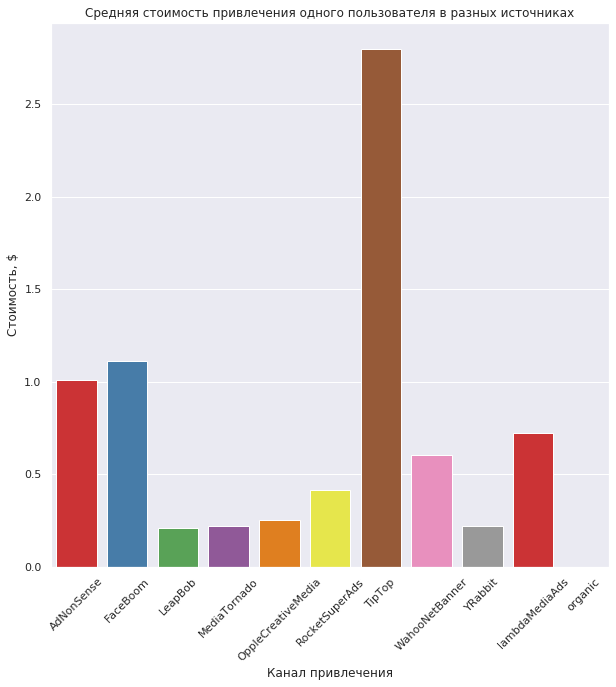

In [31]:
acq_cost_mean = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).reset_index()

display(acq_cost_mean.sort_values(by='acquisition_cost', ascending=False))

sns.set(font_scale = 0.9)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.barplot(x='channel', y='acquisition_cost', data=acq_cost_mean, palette='Set1');
plt.xticks(rotation=45);
plt.ylabel('Стоимость, $')
plt.xlabel('Канал привлечения')
plt.title('Средняя стоимость привлечения одного пользователя в разных источниках')
plt.show()

А вот теперь можно сделать какие то выводы: канал привлечения TipTop является самым дорогим по стоимости привлечения на 1 пользователя, он в 2,5 раза превосходит своего конкурента FaceBoom в цене, но показывает более низкую конверсию. Пока все сравнения не в пользу TipTop. Но окончательный вывод о каналах привлечения можно будет сделать только после сравнения ROI.

**Вывод:** Более 80% расходов на маркетинг тратится на 2 канала привлечения: TipTop и FaceBoom. По стоимости привлечения на 1 пользователя первые 4 места занимают компании показывающие самую высокую конверсию среди конкурентов. Больше всего вопросов вызывает целесообразность высокой стоимости привлечения пользователей посредством TipTop.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

**Проанализируйте общую окупаемость рекламы**

При расчетах окупаемости не будем учитывать органических пользователей, поскольку они "пришли" самостоятельно и не являются результатом работы маркетинговой кампании и маркетинговых трат, а лишь будут преукрашивать итоговые результаты.

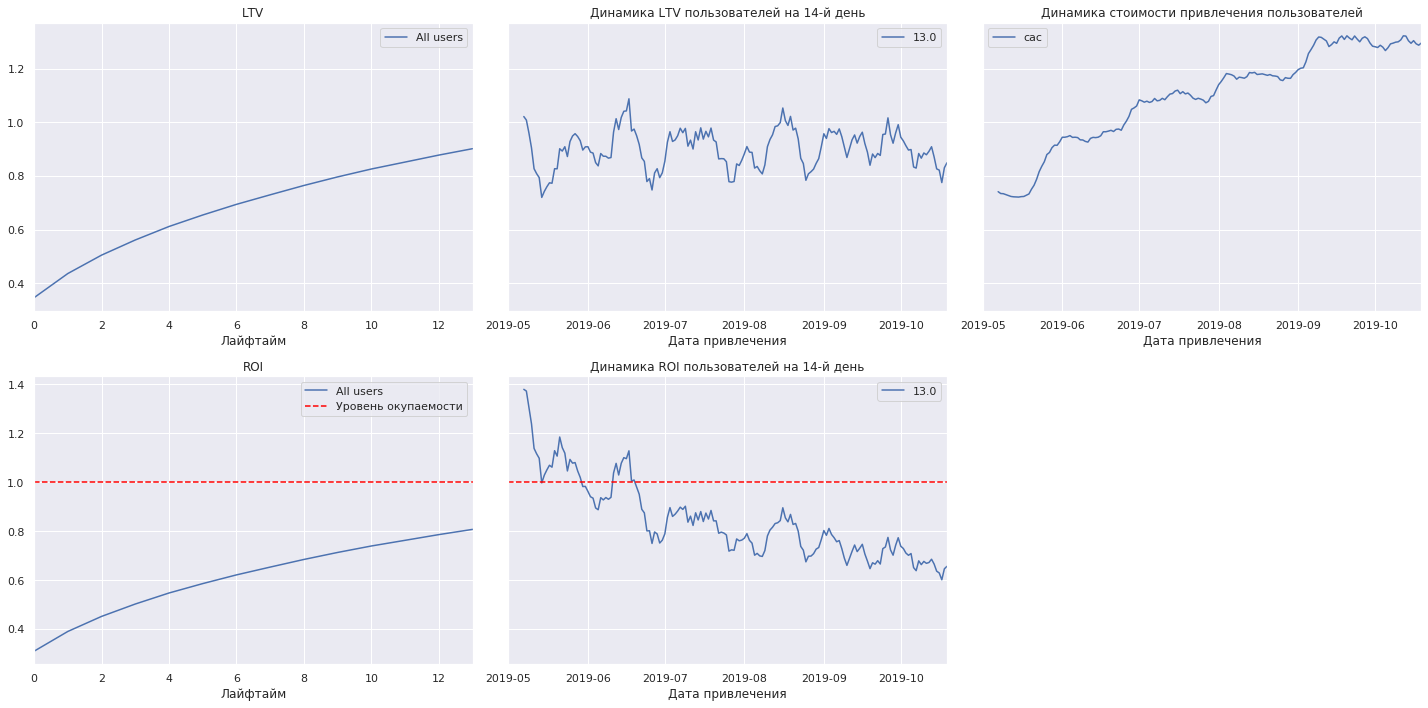

In [32]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles[profiles['channel'] != 'organic'],
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days, window=7)

Визуально по графику ROI сразу можно сказать что вложения в маркетинг не окупаются. При том что на графике Динамика LTV пользователей на 14 день видно что прибыль от пользователей стабильно находится на одном уровне, траты на маркетинг за прошедшие пол года увеличились на 50%. Как итог - с окупаемости в мае 2019 г компания все глубже скатывается в убыток.

**Проанализируйте окупаемость рекламы с разбивкой по устройствам**

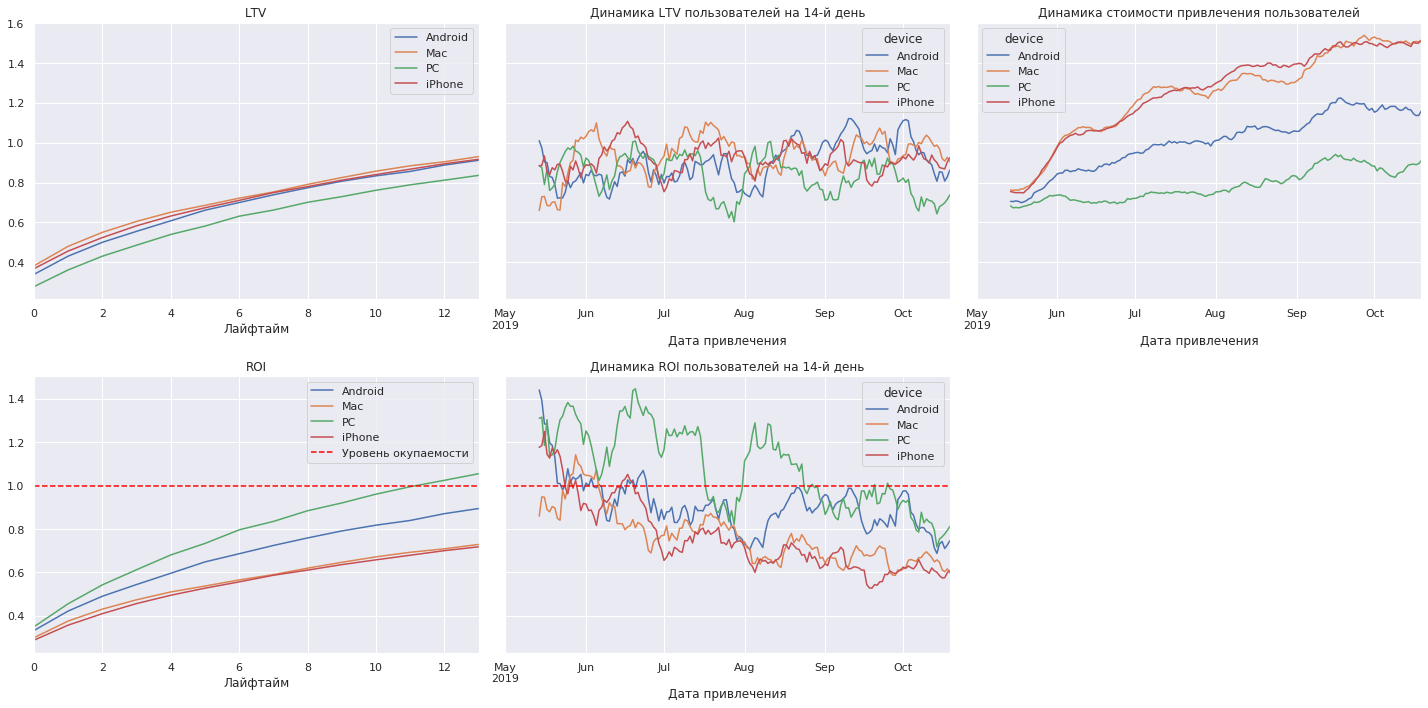

In [33]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles[profiles['channel'] != 'organic'],
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days, window=14)

На графике видно что LTV на устройствах Mac, iPhone и Android примерно одинаковые, а прибыль от пользователей PC немного отстает. Однако учитывая то что траты на продвижение в трех наиболее прибыльных платформах постоянно растут, особенно в Mac и iPhone, по итогам за весь период в окупаемость выходит только привлечение пользователей PC. После анализа второй группы графиков начинает напрашиваться предложение о снижении трат на маркетинг в наиболее затратных направлениях.

**Проанализируйте окупаемость рекламы с разбивкой по странам**

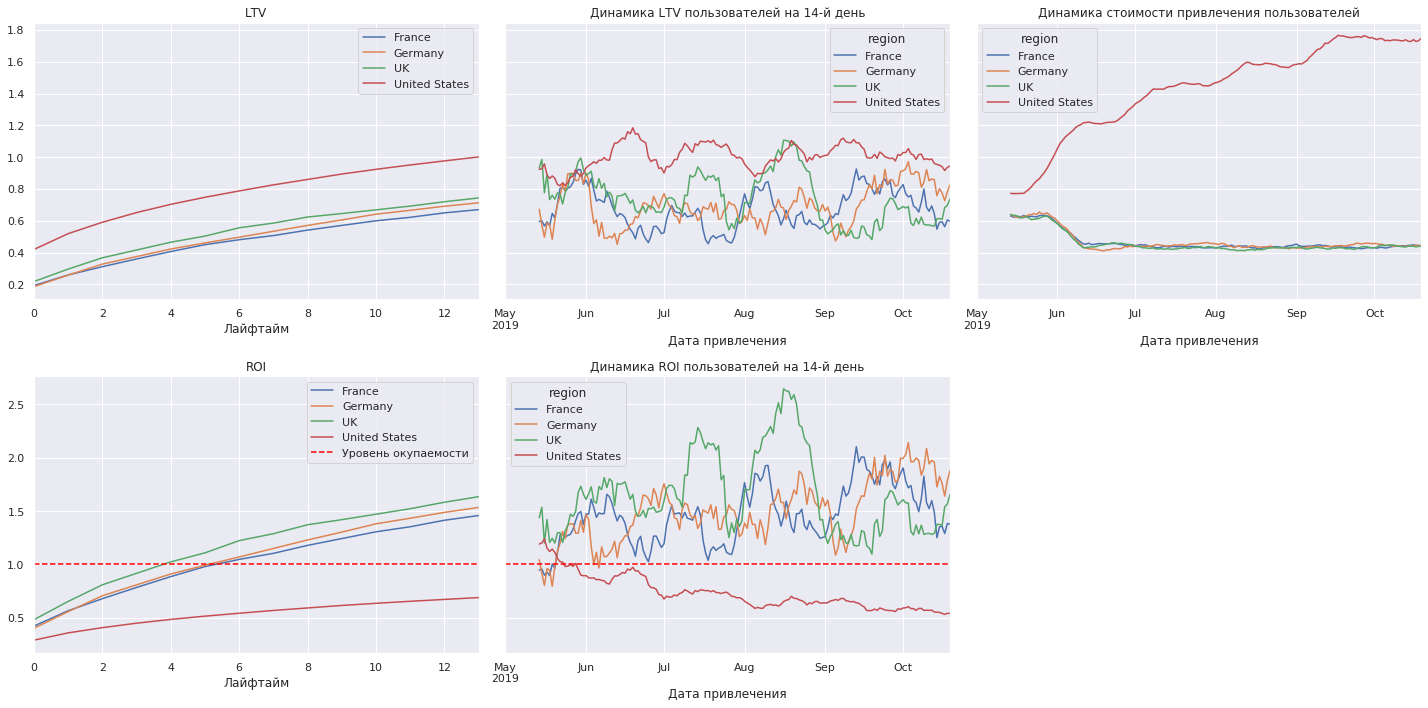

In [34]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles[profiles['channel'] != 'organic'],
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days, window=14)

На графике LTV видно что прибыль пользователей из США стабильно выше. Возможно маркетологи пытались усилить привлечение пользователей именно оттуда для увеличения прибыли компании, но эффект получился обратный - возросшие более чем в 2 раза траты на привлечение новых пользователей увеличили LTV в среднем лишь на 30%. Как итог, ROI пользователей США стремительно ушло ниже уровня окупаемости. А вот европейским пользователям рекламный бюждет не увеличивали и их ROI стабильно в хорошем плюсе. 

Но самое интересное еще впереди: как мы увидели на этапе анализа конверсии и CAC именно каналы привлечения 

**Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам**

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
lambdaMediaAds,2056,0.727237,0.632899,0.887333,1.070887,1.245178,1.432136,1.595673,1.735841,1.859323,1.986818,2.070251,2.171709,2.241794,2.331922,2.428712
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790


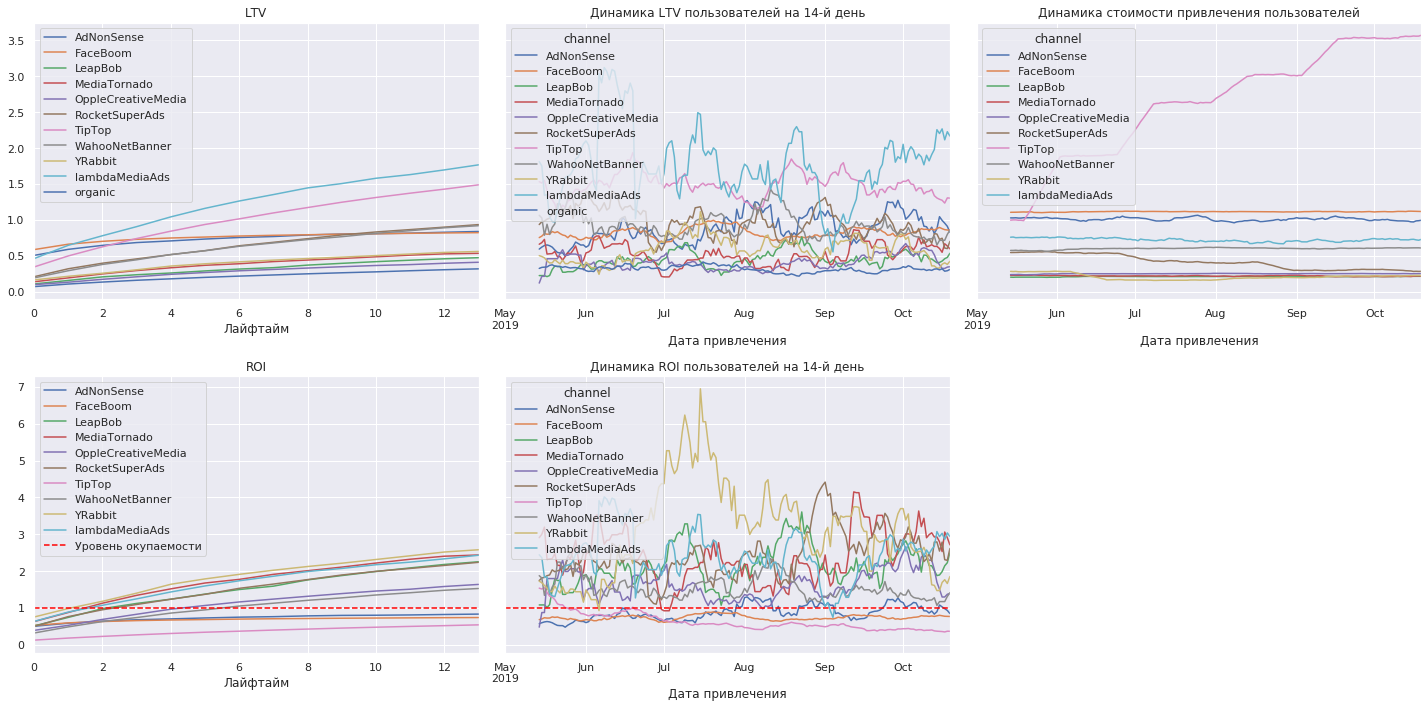

In [35]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

display(roi.sort_values(by=13, ascending=False))

plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days, window=14)

А вот причина общих убытков компании - высокие траты FaceBoom и особенно TipTop. При увеличении бюджета в 3,5 раза в TipTop за пол года динамика LTV находится примерно на том же уровне, а окупаемость на уровне всего 53%. Немногим лучше дела обстоят с каналом привлечения FaceBoom, при стабильно высоких затратах на привлечение, ROI находится на уровне 73%. А на эти 2 источника привлечения новых пользователей компания тратит более 80% рекламного бюджета. 

Совет напрашивается сам собой - уменьшить траты на каналы с низким ROI (TipTop, FaceBoom, AdNonSense), перераспределить бюджет на более окупаемые источники привлечения, такие как YRabbit, MediaTornado, lambdaMediaAds.

Прежде чем будут сделаны окончательные выводы, следует проанализировать статистику удержания пользователей.

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,134200,1.0,0.176811,0.086356,0.051468,0.034493,0.024516,0.018443,0.013994,0.011818,0.009478,0.007750,0.006610,0.005872,0.004575
True,8420,1.0,0.404751,0.316746,0.259739,0.226841,0.209264,0.187767,0.173634,0.162589,0.150950,0.149406,0.137173,0.133373,0.121496


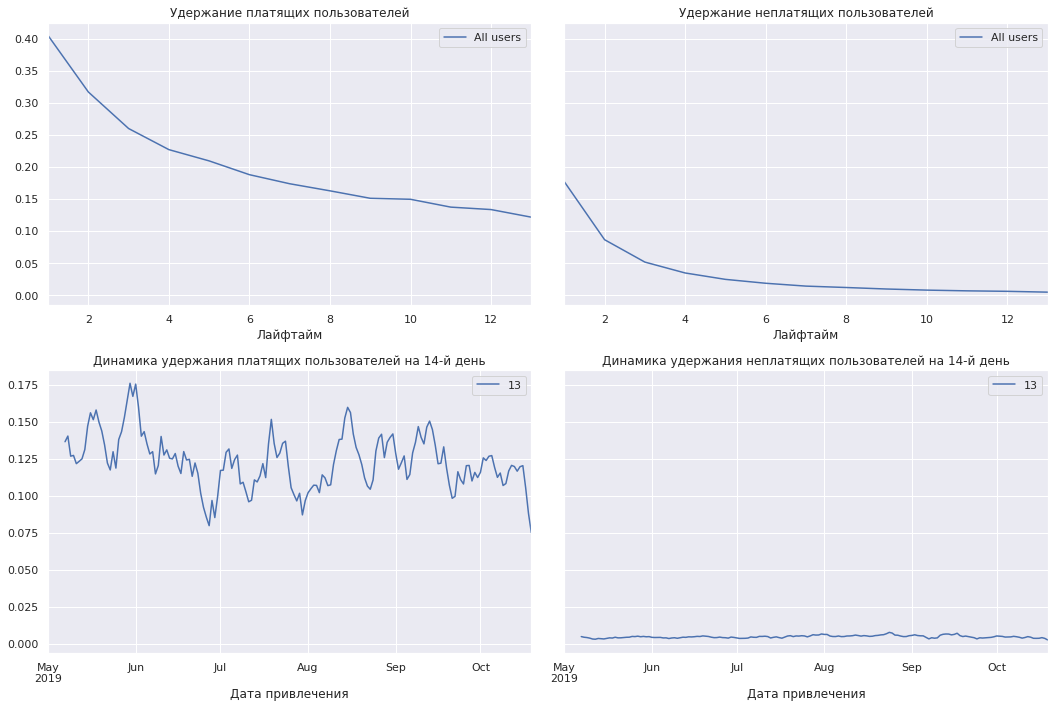

In [36]:
#посмотрим на удержание в целом

retention_raw, retention, retention_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

display(retention)

plot_retention(retention, retention_in_time, horizon_days, window=7)

cohort_size    0         1         2         3  \
payer channel                                                              
True  organic                    1110  1.0  0.561261  0.472973  0.418919   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      organic                   52866  1.0  0.176711  0.085991  0.050921   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   

                                 4         5         6         7         8  \
payer channel                                                                
True  organic             0.336036  0.327928  0.326126  0.283784  0.277477   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      organic             0.036016  0.024231  0.018121  0.013695  0.011955   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   

                                 9        10        11        12        13  
payer channel                                                               
True  organic             0.246847  0.244144  0.237838  0.229730  0.230631  
      WahooNetBanner      0.259346  0.308411  0.268692  0.252336  0.228972  
      RocketSuperAds

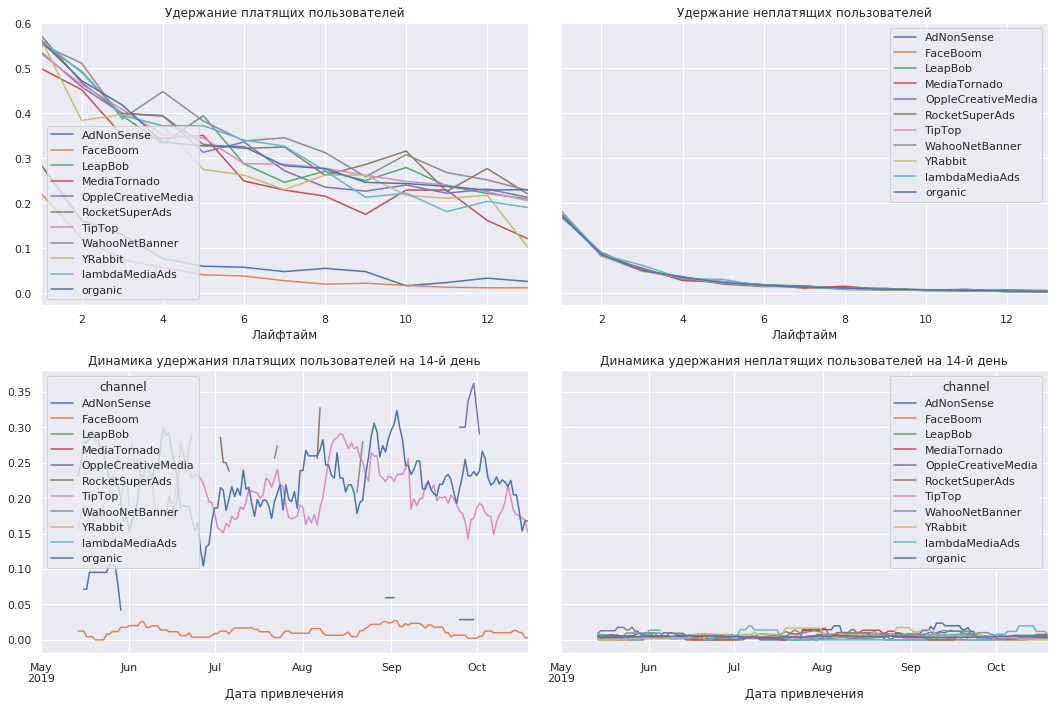

In [37]:
# отсортируем по каналу привлечения

retention_raw, retention, retention_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

display(retention.sort_values(by=['payer', 13], ascending=False))

plot_retention(retention, retention_in_time, horizon_days, window=14)

При анализе удержания пользователей которые совершали покупки видно что самый низкий показатель у источника FaceBoom (2 место по размеру маркетинговых трат), а показатель у органических пользователей стабильно высокий. Также крайне низкий результат показывает AdNonSense.

cohort_size    0         1         2         3         4  \
payer device                                                              
True  PC              1439  1.0  0.439194  0.357887  0.286310  0.282140   
      Android         1954  1.0  0.407369  0.323439  0.271238  0.227226   
      Mac             1826  1.0  0.389376  0.301752  0.227273  0.208105   
      iPhone          3201  1.0  0.396439  0.302718  0.259294  0.212434   
False PC             27539  1.0  0.174916  0.087040  0.050982  0.035114   
      iPhone         48565  1.0  0.178256  0.086770  0.052260  0.035684   
      Android        31334  1.0  0.176358  0.086583  0.052052  0.033414   
      Mac            26762  1.0  0.176668  0.084635  0.049847  0.032957   

                      5         6         7         8         9        10  \
payer device                                                                
True  PC       0.230716  0.233495  0.207783  0.198749  0.167477  0.166782   
      Android  0.225179  0.181679  0.177584  0.160696  0.151484  0.149437   
      Mac      0.192771  0.169770  0.159912  0.155531  0.147317  0.136911   
      iPhone   0.199313  0.181193  0.163699  0.151515  0.145267  0.148704   
False PC       0.024583  0.017285  0.013908  0.011620  0.008969  0.007480   
      iPhone   0.024647  0.019191  0.013878  0.012293  0.009389  0.007557   
      Android  0.024223  0.017649  0.014393  0.010851  0.009925  0.008074   
      Mac      0.024550  0.019206  0.013826  0.012294  0.009641  0.007996   

                     11        12        13  
payer device                                 
True  PC       0.163308  0.157748  0.151494  
      Android  0.126919  0.135619  0.124872  
      Mac      0.130887  0.125958  0.121577  
      iPhone   0.135270  0.125273  0.105904  
False PC       0.006391  0.005883  0.004866  
      iPhone   0.006919  0.005951  0.004551  
      Android  0.006510  0.005521  0.004532  
      Mac      0.006390  0.006128  0.004372

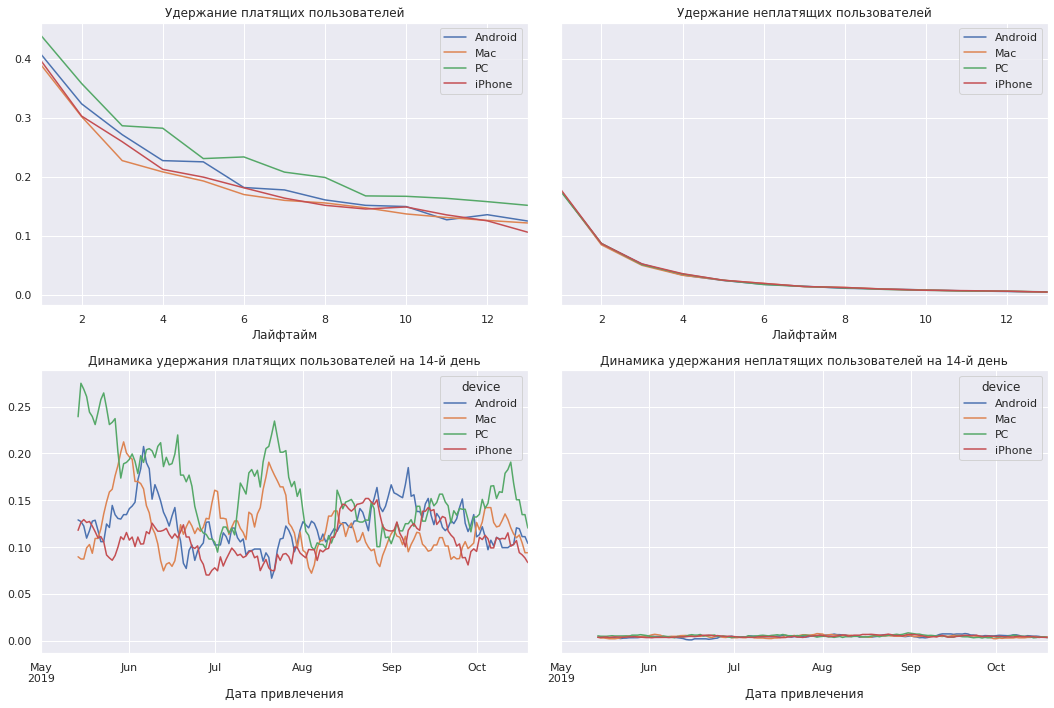

In [38]:
retention_raw, retention, retention_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

display(retention.sort_values(by=13, ascending=False))

plot_retention(retention, retention_in_time, horizon_days, window=14)

Удержание на всех платформах примерно на одном уровне, но лидирует у пользователей PC.

cohort_size    0         1         2         3         4  \
payer region                                                                    
True  UK                     659  1.0  0.502276  0.437026  0.344461  0.314112   
      France                 628  1.0  0.484076  0.404459  0.328025  0.310510   
      Germany                584  1.0  0.498288  0.438356  0.330479  0.320205   
      United States         6549  1.0  0.378989  0.285387  0.238357  0.201710   
False Germany              13660  1.0  0.173939  0.084627  0.052562  0.034480   
      France               15996  1.0  0.176232  0.088835  0.052638  0.034634   
      United States        88493  1.0  0.177426  0.085792  0.051089  0.034613   
      UK                   16051  1.0  0.176438  0.088468  0.051461  0.033705   

                            5         6         7         8         9  \
payer region                                                            
True  UK             0.288316  0.288316  0.259484  0.223065  0.171472   
      France         0.302548  0.254777  0.243631  0.221338  0.211783   
      Germany        0.292808  0.261986  0.241438  0.250000  0.214041   
      United States  0.184914  0.164605  0.152237  0.143075  0.137426   
False Germany        0.025183  0.018375  0.013836  0.012225  0.009810   
      France         0.022381  0.019130  0.015129  0.010690  0.009690   
      United States  0.024635  0.018431  0.013707  0.012001  0.009470   
      UK             0.025419  0.017881  0.014579  0.011588  0.009034   

                           10        11        12        13  
payer region                                                 
True  UK             0.177542  0.198786  0.186646  0.197269  
      France         0.214968  0.170382  0.200637  0.191083  
      Germany        0.227740  0.186644  0.176370  0.159247  
      United States  0.133303  0.123378  0.117728  0.103833  
False Germany        0.007613  0.006955  0.006296  0.005490  
      France         0.008002  0.006189  0.005376  0.005376  
      United States  0.007650  0.006419  0.005786  0.004407  
      UK             0.008161  0.007788  0.006479  0.003925

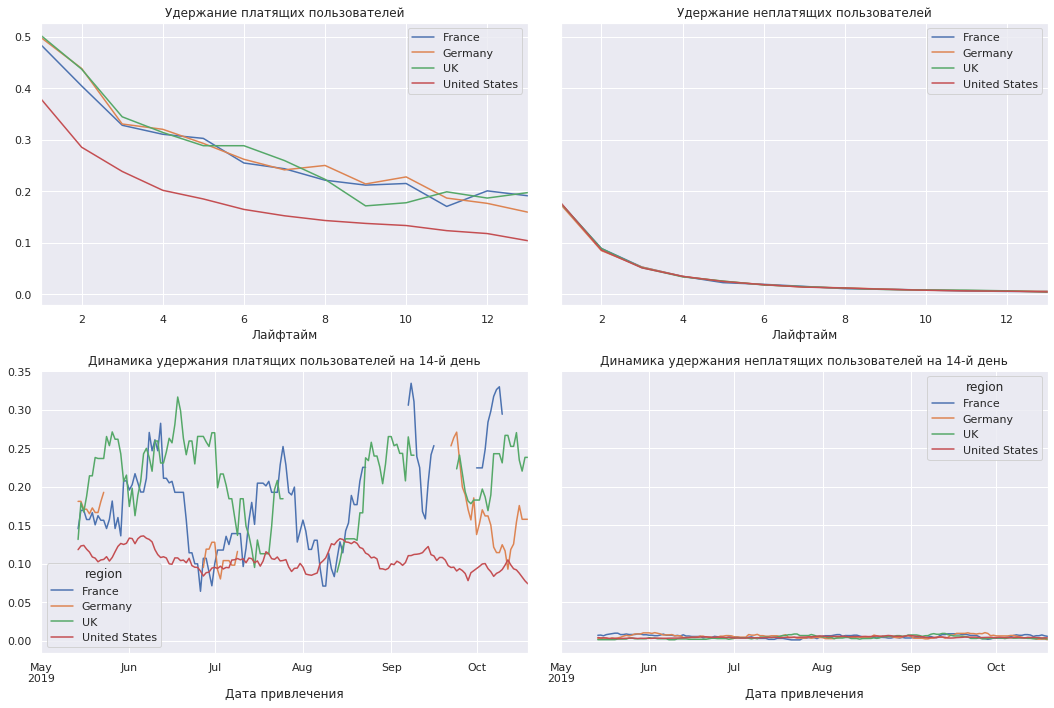

In [39]:
retention_raw, retention, retention_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

display(retention.sort_values(by=13, ascending=False))

plot_retention(retention, retention_in_time, horizon_days, window=14)

Отсортировав удержание по странам, снова можно увидеть что при высоких вложениях в рекламу пользователи США показывают не такие высокие результаты - удержание заметно ниже чем у стран Европы. А ведь для компании важно сохранять аудитория на долгий срок.

Взглянем еще раз на данные пользователей из Соединенных Штатов.

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
organic,36480,0.011760,0.014529,0.015899,0.016996,0.017681,0.018092,0.018668,0.019216,0.019572,0.019819,0.019874,0.020011,0.020093,0.020203


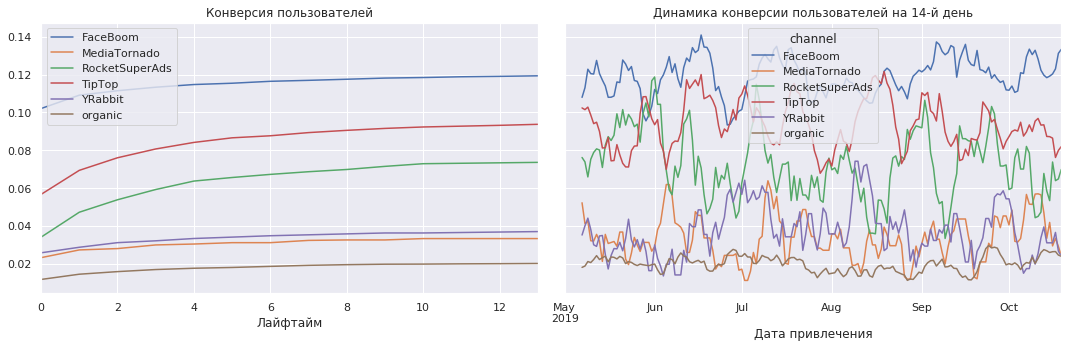

In [40]:
conversion_raw, conversion, conversion_in_time = get_conversion(
    profiles[profiles['region'] == 'United States'],
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

display(conversion.sort_values(by=13, ascending=False))

plot_conversion(conversion, conversion_in_time, horizon_days, window=7)

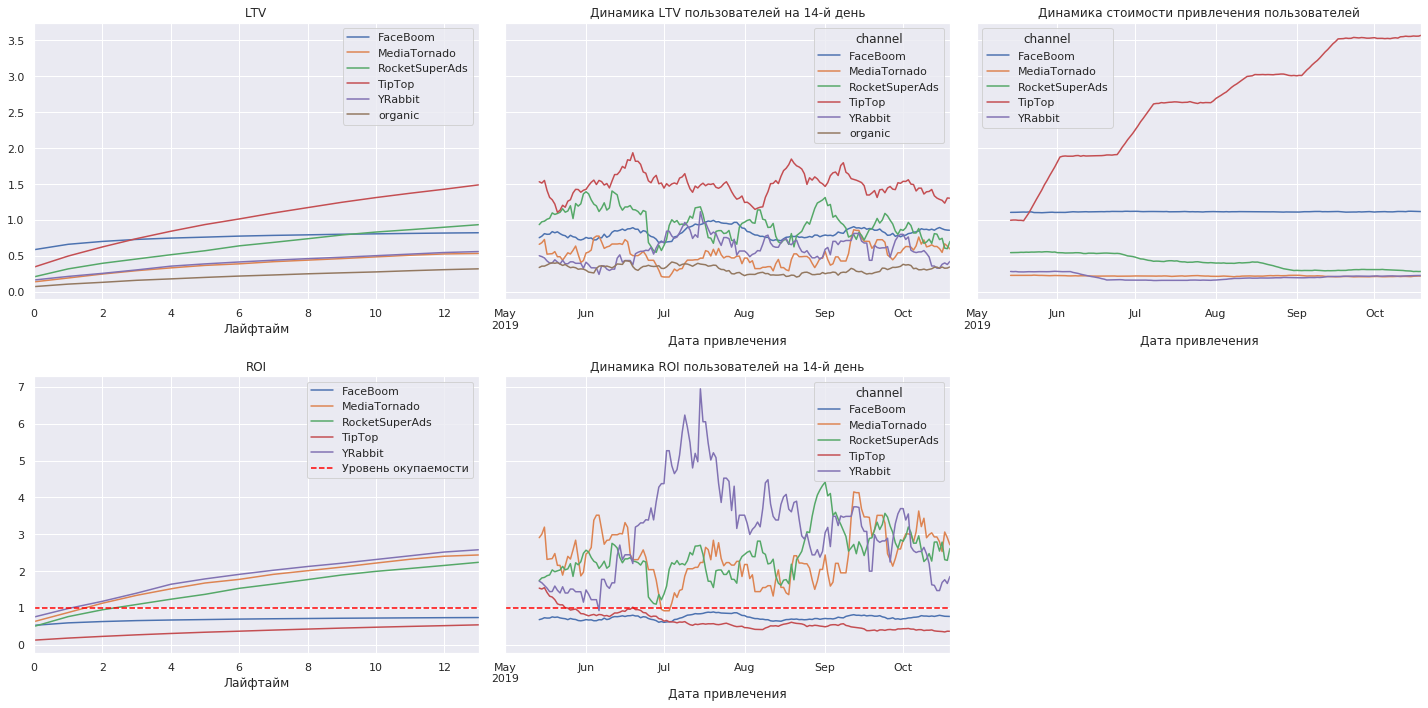

In [41]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles[profiles['region'] == 'United States'],
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days, window=14)

cohort_size    0         1         2         3  \
payer channel                                                          
True  RocketSuperAds          335  1.0  0.573134  0.468657  0.400000   
      organic                 763  1.0  0.562254  0.448231  0.432503   
      TipTop                 1785  1.0  0.532773  0.464426  0.408964   
      MediaTornado            148  1.0  0.500000  0.452703  0.351351   
      YRabbit                 156  1.0  0.564103  0.384615  0.397436   
      FaceBoom               3362  1.0  0.222487  0.123141  0.075253   
False YRabbit                3946  1.0  0.180182  0.083376  0.049164   
      MediaTornado           4019  1.0  0.183130  0.082359  0.056482   
      organic               35717  1.0  0.177730  0.086037  0.050984   
      FaceBoom              24182  1.0  0.172980  0.087214  0.050782   
      TipTop                16713  1.0  0.181715  0.084605  0.050859   
      RocketSuperAds         3916  1.0  0.175179  0.085802  0.051328   

                             4         5         6         7         8  \
payer channel                                                            
True  RocketSuperAds  0.394030  0.331343  0.322388  0.325373  0.262687   
      organic         0.338139  0.326343  0.323722  0.275229  0.276540   
      TipTop          0.352381  0.345658  0.288515  0.287395  0.277871   
      MediaTornado    0.344595  0.351351  0.250000  0.229730  0.216216   
      YRabbit         0.371795  0.275641  0.262821  0.230769  0.262821   
      FaceBoom        0.057406  0.041344  0.038667  0.028257  0.020523   
False YRabbit         0.035226  0.023822  0.016219  0.014192  0.009883   
      MediaTornado    0.028614  0.024882  0.018661  0.011694  0.015924   
      organic         0.036257  0.024050  0.017919  0.013551  0.012179   
      FaceBoom        0.032710  0.025267  0.019767  0.013605  0.011910   
      TipTop          0.034943  0.026028  0.018848  0.013941  0.012086   
      RocketSuperAds  0.035495  0.020684  0.015066  0.016343  0.008682   

                             9        10        11        12        13  
payer channel                                                           
True  RocketSuperAds  0.286567  0.316418  0.226866  0.277612  0.220896  
      organic         0.251638  0.255570  0.247706  0.229358  0.212320  
      TipTop          0.262745  0.248739  0.240896  0.225770  0.206162  
      MediaTornado    0.175676  0.229730  0.229730  0.162162  0.121622  
      YRabbit         0.262821  0.217949  0.211538  0.217949  0.102564  
      FaceBoom        0.022606  0.017847  0.013682  0.012493  0.012493  
False YRabbit         0.008363  0.006336  0.006336  0.004562  0.005068  
      MediaTornado    0.008460  0.007216  0.008957  0.004479  0.004976  
      organic         0.009463  0.007811  0.006412  0.005572  0.004564  
      FaceBoom        0.010007  0.008064  0.005500  0.006616  0.004342  
      TipTop          0.009633  0.007240  0.006701  0.006103  0.004248  
      RocketSuperAds  0.007661  0.007150  0.008427  0.003830  0.002809

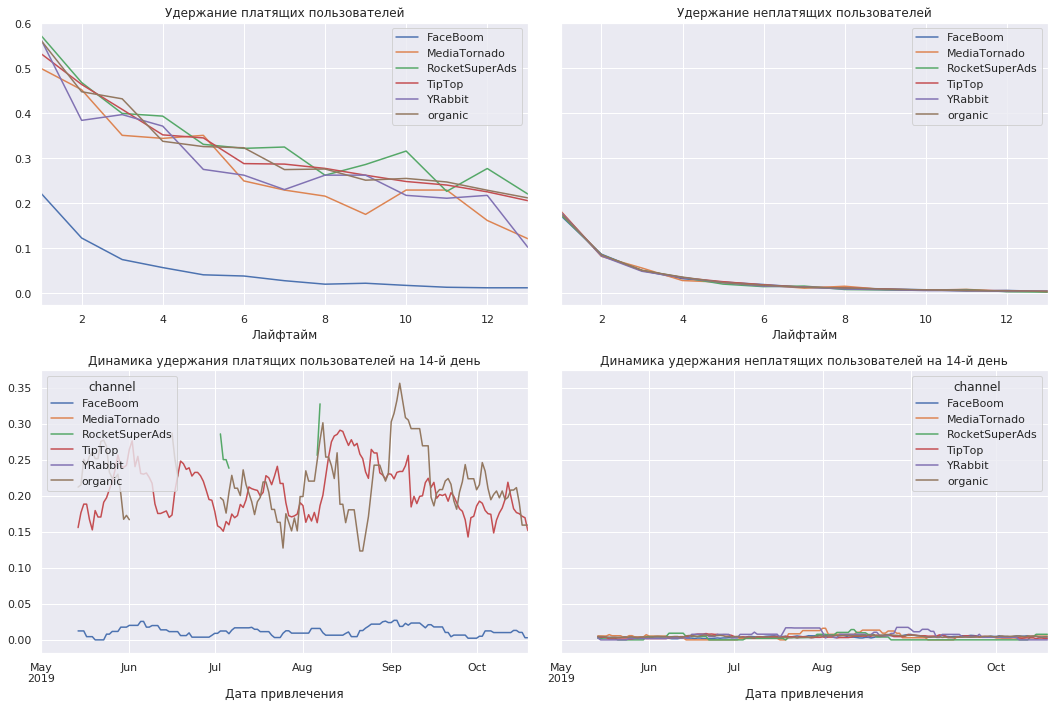

In [42]:
retention_raw, retention, retention_in_time = get_retention(
    profiles[profiles['region'] == 'United States'],
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

display(retention.sort_values(by=13, ascending=False))

plot_retention(retention, retention_in_time, horizon_days, window=14)

Еще раз взглянув на данные можно прийти к простому выводу - маркетологи оказались плохими экономистами. FaceBoom и TipTop показывают самую высокую конверсию, да и LTV у них на высоком уровне, но у обоих источников есть уязвимые места из-за которых весь маркетинг сошел на нет: 
- FaceBoom имеет кране низкое удержание и стабильно высокий CAC
- TipTop имеет хорошие показатели, но все более и более возрастающий САС не позволяет выйти в прибыль.

Как итог, мы получаем убыток компании.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**Причины неэффективности привлечения пользователей:**
- Гиперфокусировка маркетингового бюждета на 2 каналах привлечения. На 2 источника привлечения было потрачено 80% рекламного бюджета.
- Неудачный выбор фокусных направлений, отсутствие предварительного анализа. Каналы привлечения FaceBoom и AdNonSense имеют очень низкие показатели удержания клиентов, при том что находятся на 2 и 4 месте по объему трат. Удержание для сферы развлекательных приложений является одним из важнейших показателей, обеспечивающих планомерное увеличение прибыльности компании. Что касается TipTop - он еще в начале периода имел самый низкий показатель ROI.
- Отсутствие промежуточного сбора и анализа результатов маркетинговой кампании. Несмотря на отсутствие увеличения динамики LTV и низкие показатели удержания пользователей TipTop и FaceBoom их бюджеты только увеличивались.

**Рекомендации:**
- Распределить рекламный бюджет на источники с более высоким ROI и высоким удержанием, например, lambdaMediaAds, LeapBob, RocketSuperAds
- Разработать механизмы увеличения удержания клиентов (е-маил рассылки, дополнительные предложения для тех кто совершил вторую покупку / вернулся в приложение)
- Увеличить конверсию по каналу organic (сделать спецпредложение на сайте, которое не увидят пришедшие из других каналов; запустить акцию "пригласи друга"). Данный канал перспективен по причине большого количества привлечений новых пользователей в приложение и самым высоким удержанием.
- Разработать систему поощрения за ежедневное использование приложениея / использование приложения на разных платформах (это должно привести к увеличению удержания клиентов)